In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_MAS = df[(df['job_title_short'] == 'Data Analyst')
               & (df['job_country'] == 'Malaysia')]

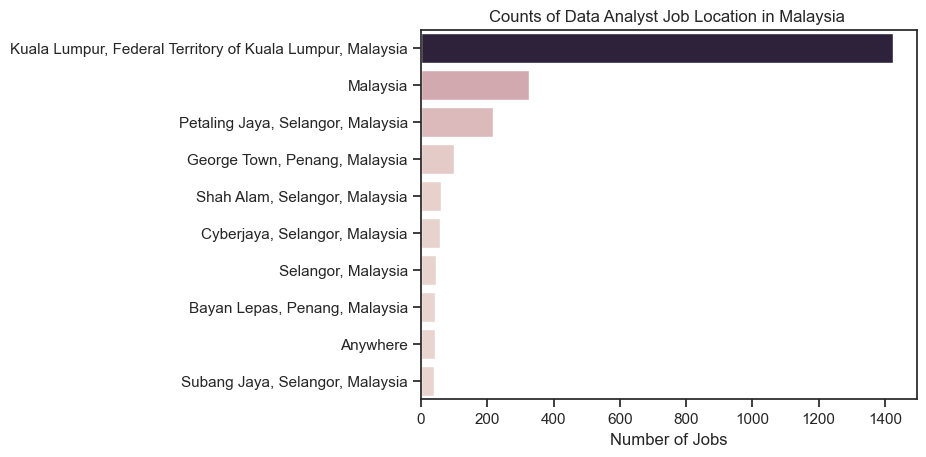

In [ ]:
df_plot = df_DA_MAS['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',
            hue='count', legend=False)
plt.title('Counts of Data Analyst Job Location in Malaysia ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

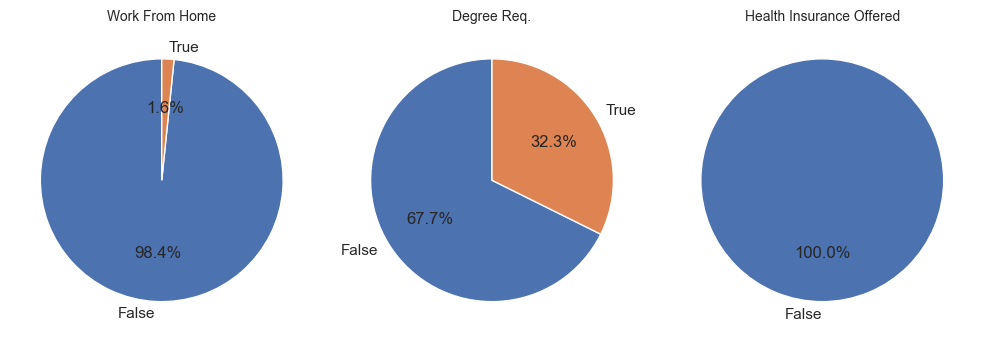

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_MAS[column].value_counts()
    labels = counts.index.astype(str)
    ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, fontsize=10)

fig.tight_layout()
plt.show()

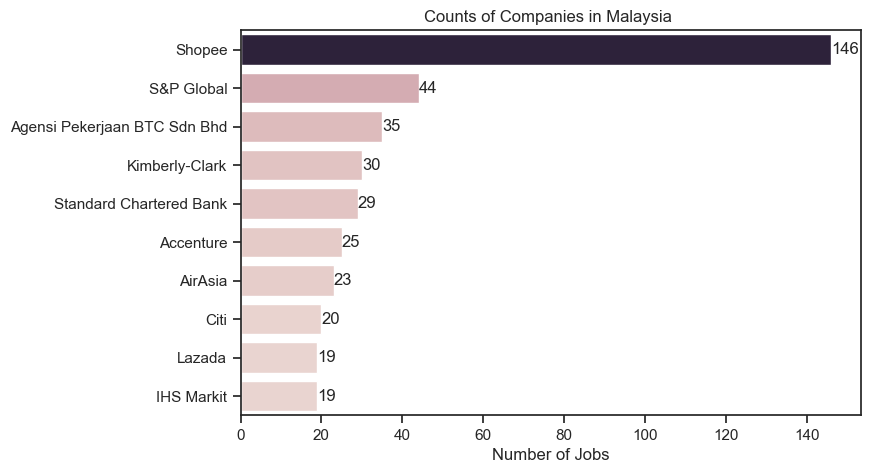

In [ ]:
df_plot = df_DA_MAS['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(data=df_plot, x='count', y='company_name',
            hue='count', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')
    
plt.title('Counts of Companies in Malaysia ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()